# **Gradient Boosting**
### 주요 개념
* 앙상블 학습: 여러 모델(약한 학습기)을 결합하여 전체 성능을 향상시킵니다.
* 부스팅: 각 새로운 모델이 이전 모델의 오류를 수정하는 방식으로 순차적으로 학습합니다.
* 약한 학습기: 성능이 약간 우수한 간단한 모델로, 보통 얕은 의사결정 트리를 사용합니다.

### Gradient Boosting의 특징
* 회귀 및 분류 문제를 해결하는 데 사용되는 강력한 기계 학습 기법

* 기능 공간에서의 부스팅을 기반으로 하는 기계 학습 기술로, 기존 부스팅에 사용되는 일반적인 잔차가 아닌 유사 잔차를 사용한다
    * 일반잔차: 실제 값과 예측 값의 차이.
    * 유사잔차: 손실 함수의 음의 그래디언트로, 현재 모델의 예측값을 개선하기 위해 사용.
    
* 경사 하강법: 손실 함수의 미분을 통해 반복적으로 최솟값으로 이동하는 최적화 알고리즘입니다.


* $L_{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - F(x_i) \right)^2$


* $ -\frac{\partial L_{MSE}}{\partial F(x_i)} = \frac{2}{n} \left( y_i - F(x_i) \right) = \frac{2}{n} h_m(x_i)$

    * $F$: m번째 모델
    * $y$: 관측값
    * $h_{m}$: m번째 모델 잔차



### Gradient Boosting 과정
1. 모델 초기화: 초기 예측값으로 시작합니다. 회귀 문제의 경우 보통 평균값을 사용합니다.
2. 잔차 계산: 실제 값과 현재 모델의 예측 값 사이의 차이(잔차)를 계산합니다.
3. 새 모델 학습: 잔차를 예측하기 위해 새로운 약한 학습기를 학습시킵니다.
4. 모델 업데이트: 새로운 모델의 예측을 기존 모델에 일정 학습률로 더해 예측을 업데이트합니다.
5. 반복: 잔차 계산, 새로운 모델 학습, 예측 업데이트 과정을 정지 조건(예: 최대 반복 횟수 또는 수렴)까지 반복합니다.

장점
높은 정확도: Gradient Boosting은 정확하고 강력한 모델을 만드는 데 도움을 줍니다.
유연성: 다양한 유형의 데이터와 손실 함수를 처리할 수 있습니다.
특징 중요도: 각 특징의 중요도를 파악할 수 있습니다.

###  1)라이브러리 설치하기

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# 그래프 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

### 2) 데이터 불러오기
사이킷런에 내장된 위스콘신 유방암 데이터셋을 load_breast_cancer()

In [ ]:
raw_df = load_breast_cancer()
features = raw_df.data
labels = raw_df.target

cancer_df = pd.DataFrame(data = features, columns = raw_df.feature_names)
cancer_df['target'] = labels

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 3) EDA

In [ ]:
cancer_df.shape

(569, 31)

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
print(raw_df.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


### 위스콘신 유방암 데이터는 569행과 31개의 열로 이뤄져있으며, null값은 없습니다.

* 한 행(row)은 곧 하나의 환자에 대한 관측치를 의미합니다.
* target 레이블은 malignant(악성)가 0, benign(양성)이 1로 되어있습니다.
* target의 분포는 1인 양성이 357개, 0인 악성이 212개로 구성되어있습니다.
* target을 제외한 나머지 30개의 변수들은 (유방 조직 촬영을 통해 확인된) 세포핵의 특징을 나타내는 수치형 변수입니다. 세포핵의 특징에 따라 양성(1)인지 악성(0) 여부가 결정됩니다.

In [ ]:
# 기술통계량 확인
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


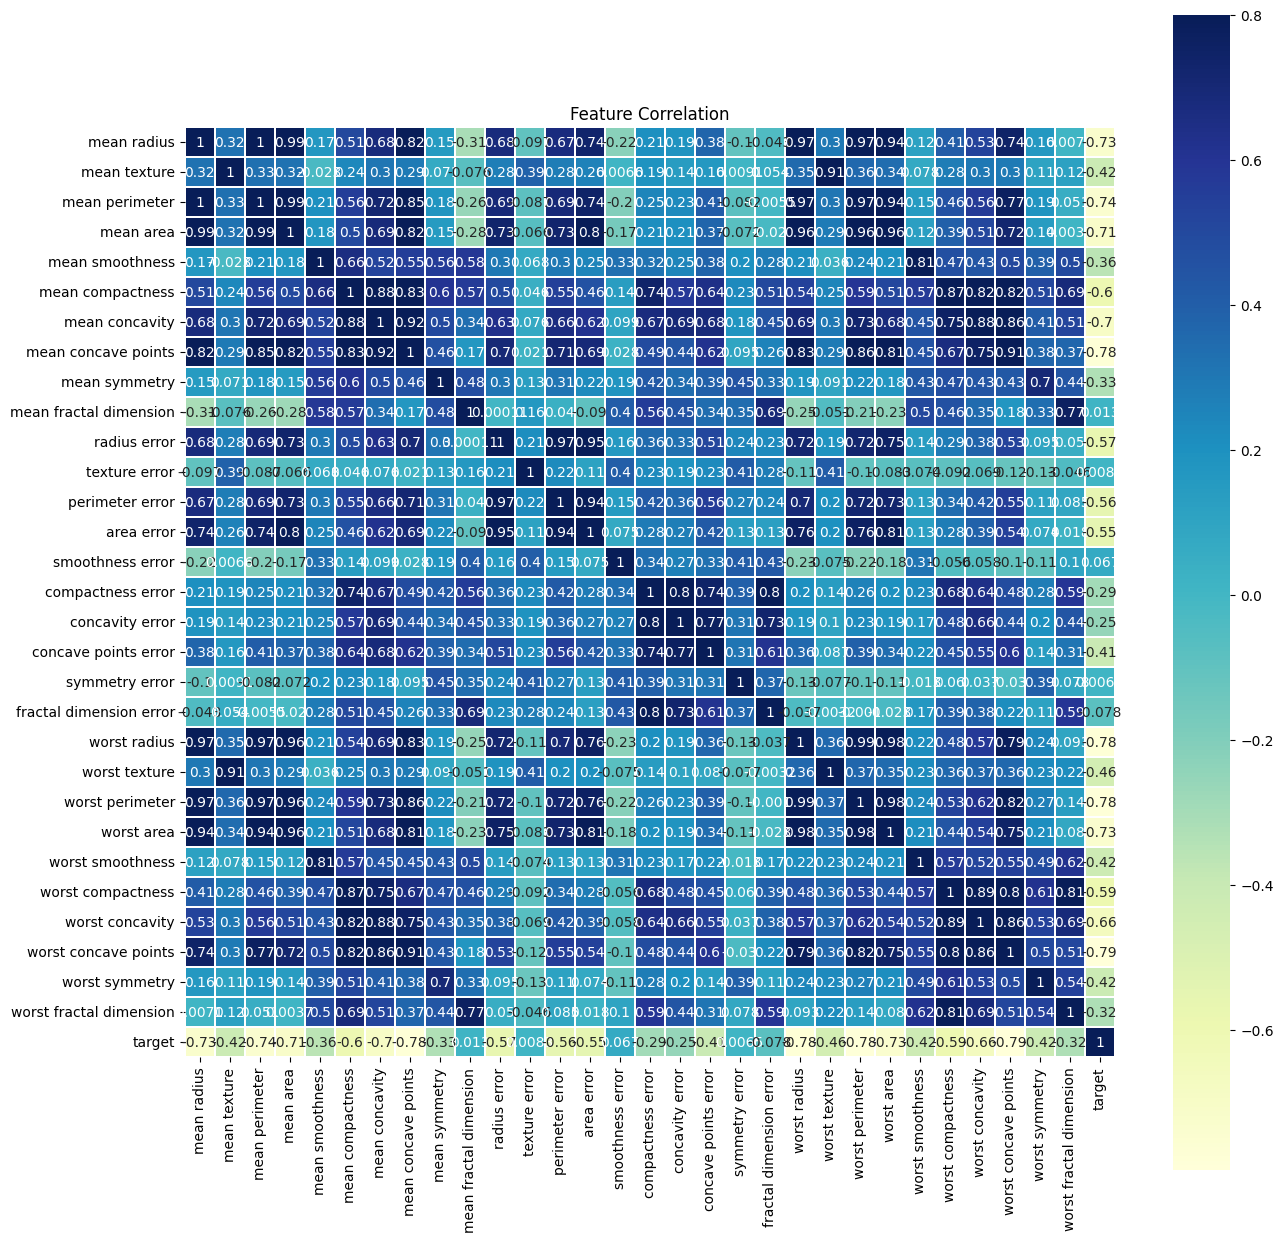

In [ ]:
# 상관관계 히트맵
corr = cancer_df.corr()
plt.figure(figsize=(15, 15));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation');

대부분의 feature의 경우 target과 음의 상관관계를 보이고 있습니다.

대체로 변수 값이 클수록 0(악성)인 경향을 보입니다

### 특히 강한 음의 상관성을 보이는 다음 5개 변수들에 대하여 더 자세히 살펴보고자 합니다.

* worst concave points (-0.79)
* worst radius (-0.78)
* worst perimeter (-0.78)
* mean concave points (-0.78)
* mean perimeter (-0.74)

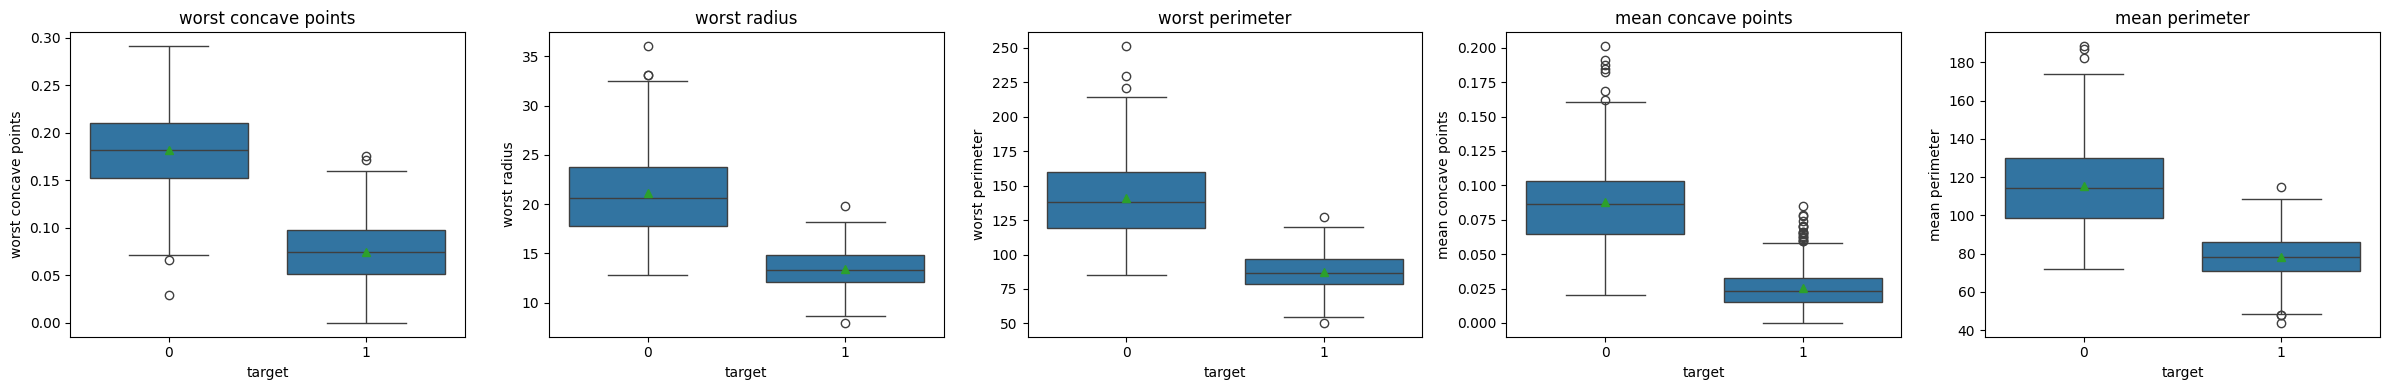

In [ ]:
cols = ['worst concave points', 'worst radius', 'worst perimeter', 'mean concave points', 'mean perimeter']

figure, ax_list_list = plt.subplots(nrows=1, ncols=5)
ax_list = ax_list_list.reshape(5)
figure.set_size_inches(24,4)

for i in range(len(cols)):
    col = cols[i]
    sns.boxplot(data = cancer_df,
                x = 'target',
                y = col,
                showfliers = True, showmeans = True,
                ax = ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()
plt.show()

0(악성), 1(양성) 각각의 경우에 대하여 변수들의 분포의 차이가 유의한 것으로 보입니다.

해당 변수(feature)들이 모델의 주요한 feature로 작용할 것이라 예상됩니다.

### 4) train-test split
전체 데이터를 8:2의 비율로 학습, 테스트 데이터로 나누겠습니다.

In [ ]:
y = cancer_df['target']
X = cancer_df.drop(columns='target')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 156)

In [ ]:
print('학습용 데이터셋(train data) 행 개수: {}'.format(X_train.shape[0]))
print('테스트용 데이터셋(test data) 행 개수: {}'.format(X_test.shape[0]))

학습용 데이터셋(train data) 행 개수: 455
테스트용 데이터셋(test data) 행 개수: 114


### 5) 모델링
* 사이킷런에서 제공하는 GradientBoostingClassifier 클래스를 이용해 유방암 데이터셋을 분류 예측해보겠습니다.

또한 GBM으로 학습하는 데 시간이 얼마나 걸리는지도 측정해보겠습니다.

In [ ]:
# GBM 수행 시간 측정
start_time = time.time()

# 모델 설정
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)

# GBM 학습 및 예측 성능 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도: 0.9561
GBM 수행 시간: 1.4 초


BM 정확도: 0.9561
GBM 수행 시간: 0.4 초
test 데이터(X_test)를 이용해 측정한 GBM의 정확도는 95.61%로 매우 높은 편입니다.

수행 시간은 0.4초로 빠른 편입니다.

train 데이터의 크기(455, 30)가 크지 않아 학습에 오랜 시간이 소요되지 않은 것으로 보입니다.


만약 정확도(Accuracy) 뿐만 아니라 정밀도(Precision), 재현율(Recall)도 보고 싶다면 아래 코드를 추가해 확인해보시기를 바랍니다.

In [ ]:
# 더 많은 성능지표를 보기 위한 라이브러리 설치
from sklearn.metrics import precision_score, recall_score

gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
print('GBM 정밀도: {0:.4f}'.format(gb_precision))
print('GBM 재현율: {0:.4f}'.format(gb_recall))

GBM 정밀도: 0.9737
GBM 재현율: 0.9610


### 6) Feature importance 시각화

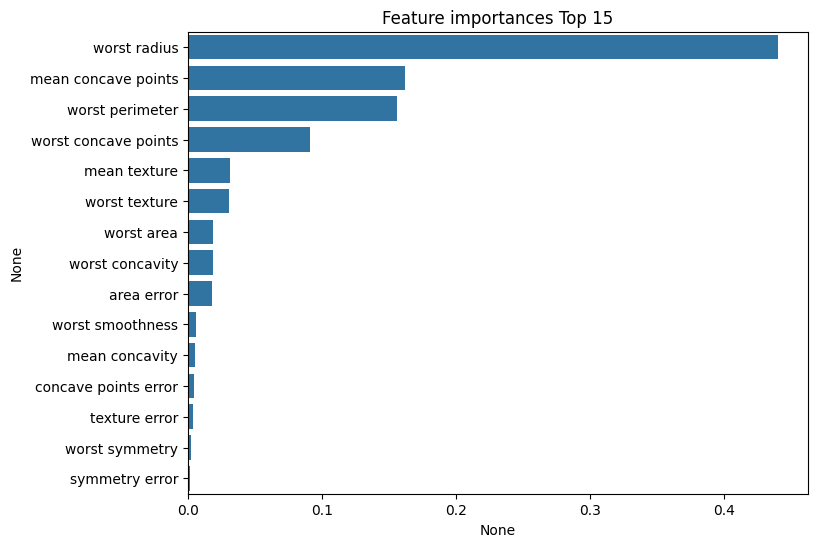

In [ ]:
# feature_importances_ 속성을 이용해 변수 중요도 시각화하기
ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 15')
sns.barplot(x = ftr_top15, y = ftr_top15.index)
plt.show()